In [1]:
import os
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


constants = imp.load_source('constants', '../src/constants.py')
nTrain = constants.nTrain
nVal = constants.nVal
nTest = constants.nTest

%matplotlib inline

In [22]:
Xtrain = np.load('../data/features/openai_train.npz')['arr_0'].reshape(-1,1)
Xval = np.load('../data/features/openai_val.npz')['arr_0'].reshape(-1,1)
Xtest = np.load('../data/features/openai_test.npz')['arr_0'].reshape(-1,1)

In [4]:
old_train = pd.read_csv('../data/old_train_test/train.csv',sep=';',index_col=0)
old_val = pd.read_csv('../data/old_train_test/val.csv',sep=';',index_col=0)
old_test = pd.read_csv('../data/old_train_test/test.csv',sep=';',index_col=0)
train = pd.read_csv('../data/train.csv',sep=';',index_col=0)
val = pd.read_csv('../data/val.csv',sep=';',index_col=0)
test = pd.read_csv('../data/test.csv',sep=';',index_col=0)

ytrain = train['sentiment'].values
yval = val['sentiment'].values
ytest = test['sentiment'].values

In [13]:
old_train['openai'] = Xtrain
old_val['openai'] = Xval
old_test['openai'] = Xtest

In [15]:
df = old_train.append(old_val).append(old_test)
train['openai'] = df['openai']
val['openai'] = df['openai']
test['openai'] = df['openai']

In [18]:
np.savez_compressed(open('../data/features/openai_train.npz','wb'),train['openai'].values)
np.savez_compressed(open('../data/features/openai_val.npz','wb'),val['openai'].values)
np.savez_compressed(open('../data/features/openai_test.npz','wb'),test['openai'].values)

In [23]:
from sklearn.linear_model import LogisticRegressionCV
classifier = LogisticRegressionCV()

In [22]:
pd.crosstab?

In [28]:
classifier.fit(Xtrain,ytrain)
ypreds = classifier.predict(Xval)
np.mean(ypreds == yval)

0.668

In [24]:
ypreds
a = pd.DataFrame(np.array([ypreds,yval]).T,columns=['pred','actual'])
pd.crosstab(a['pred'],a['actual'])

actual,-1,0,1
pred,,,
-1,246,119,14
0,61,123,44
1,22,82,289


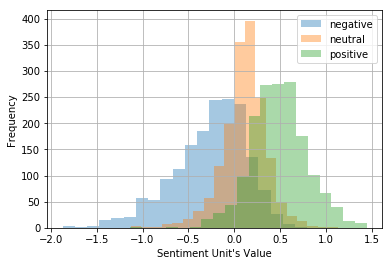

In [33]:
pd.Series(Xtrain[ytrain == -1].flatten()).hist(alpha=0.4,bins=20, label='negative')
pd.Series(Xtrain[ytrain == 0].flatten()).hist(alpha=0.4,bins=20, label='neutral')
pd.Series(Xtrain[ytrain == 1].flatten()).hist(alpha=0.4,bins=20, label='positive')
plt.xlabel("Sentiment Unit's Value")
plt.ylabel('Frequency')
plt.legend()

In [26]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(classifier.predict(Xval), yval)

(array([0.74772036, 0.37962963, 0.83285303]),
 array([0.64907652, 0.53947368, 0.73536896]),
 array([0.69491525, 0.44565217, 0.78108108]),
 array([379, 228, 393], dtype=int64))

In [27]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(Xtrain,ytrain)
np.mean(classifier.predict(Xtrain) == ytrain)

0.6706